In [6]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torchvision.utils import make_grid
import os, sys
from PIL import Image
import pandas as pd

In [2]:
current_path = os.path.dirname(os.path.abspath(sys.argv[0]))
labels_path = current_path + '/index.csv'

In [3]:
class FashionDataset(Dataset):

    def __init__(self, csv_file, data_dir, transform = None):
        self.data_dir = data_dir
        self.transform = transform
        self.csv_file = pd.read_csv(csv_file)
        self.len = self.csv_file.shape[0]

    def __getitem__(self, index):
        image_name = os.path.join(self.data_dir, self.csv_file['image'][index])
        image = np.array(Image.open(image_name))

        label = self.csv_file['category'][index]

        if self.transform :
            image = self.transform(image)

        return image, label

    def __len__(self):
        return self.len


In [15]:
dataset = FashionDataset(csv_file = labels_path, data_dir = current_path)
data_loader = DataLoader(dataset = dataset, batch_size = 10)

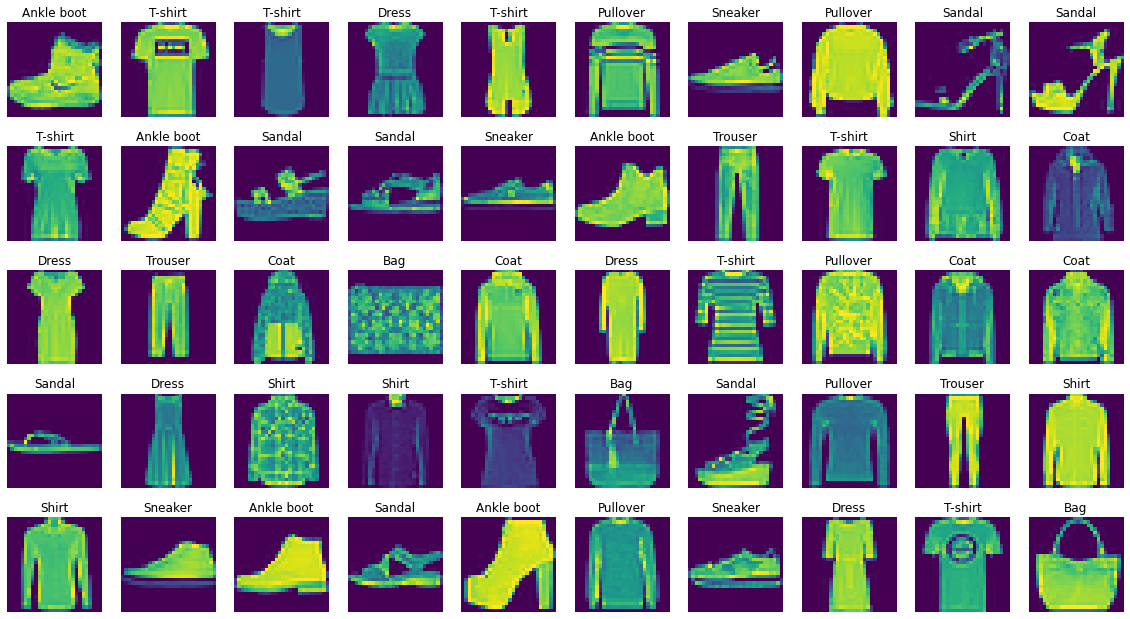

In [24]:
fig, ax = plt.subplots(5,10, figsize = (20,11))
ax = ax.reshape((ax.shape[0] * ax.shape[1]))

ax_counter = 0
for images, labels in data_loader :
    
    for var1 in range(len(images)):
        ax[ax_counter].imshow(images[var1]) 
        ax[ax_counter].set_title(labels[var1]) 
        ax[ax_counter].axis(False)
        
        if ax_counter < 49 :
            ax_counter += 1